# Sentiment analysis
Data preprocessing, afinn score
under python3

In [1]:
from afinn import Afinn

In [2]:
import numpy as np
import pandas as pd

In [3]:
review = pd.read_csv("reviews_details.csv", sep=",",encoding='windows-1252')
kaggle=pd.read_csv("kaggle.csv", sep=",")
kaggle.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [4]:
# review.groupby(by='listing_id').head(10)

In [5]:
# review["comments"] = pd.to_string(df["comments"])
review['comments'] = review['comments'].astype('str') 

In [6]:
review['comments']=review['comments'].fillna("")
review['comments'] = review['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
review['comments'].head()

0    daniel is really cool. the place was nice and ...
1    daniel is the most amazing host! his place is ...
2    we had such a great time in amsterdam. daniel ...
3    very professional operation. room is very clea...
4    daniel is highly recommended. he provided all ...
Name: comments, dtype: object

In [7]:
review['comments'] = review['comments'].str.replace('[^\w\s]','')
review['comments'].head()

0    daniel is really cool the place was nice and c...
1    daniel is the most amazing host his place is e...
2    we had such a great time in amsterdam daniel i...
3    very professional operation room is very clean...
4    daniel is highly recommended he provided all n...
Name: comments, dtype: object

In [8]:
afinn = Afinn()
afinn_scores = [afinn.score(text) for text in review.comments]
review['afinn'] = afinn_scores
# review[['afinn', 'comments']].head(10)

In [8]:
# review['averagescore']=review.groupby('listing_id')['afinn'].mean()
# 
# review[['listing_id','averagescore']].head()

# review=review.sort_values(by=['listing_id'])
review['averagescore'] =review['afinn'].groupby(review['listing_id']).transform('mean')
review.describe()

,listing_id,id,reviewer_id,price,afinn,averagescore
count,4.318300e+05,4.318300e+05,4.318300e+05,431830.000000,431830.000000,431830.000000
mean,9.540278e+06,1.676551e+08,5.844055e+07,132.452819,9.364671,9.364671
std,7.646134e+06,1.027225e+08,5.424683e+07,102.270810,8.689700,2.891419
min,2.818000e+03,1.191000e+03,4.370000e+02,0.000000,-69.000000,-24.000000
25%,2.482541e+06,7.596344e+07,1.533860e+07,85.000000,3.000000,7.500000
50%,7.815853e+06,1.591030e+08,3.931767e+07,110.000000,9.000000,9.210526
75%,1.546254e+07,2.565866e+08,8.973084e+07,150.000000,14.000000,11.050000
max,3.055009e+07,3.559969e+08,2.288387e+08,8500.000000,110.000000,51.000000


In [9]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,name,neighboor,room_type,price,afinn,averagescore
0,2818,1191,2009/3/30,10952,Lam,daniel is really cool the place was nice and c...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,4.0,10.653226
1,2818,1771,2009/4/24,12798,Alice,daniel is the most amazing host his place is e...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,16.0,10.653226
2,2818,1989,2009/5/3,11869,Natalja,we had such a great time in amsterdam daniel i...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,16.0,10.653226
3,2818,2797,2009/5/18,14064,Enrique,very professional operation room is very clean...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,15.0,10.653226
4,2818,3151,2009/5/25,17977,Sherwin,daniel is highly recommended he provided all n...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,9.0,10.653226


In [10]:
review['sentiment']=review.averagescore.map(lambda value:  'highly positive' if value > 25 else 'positive' if 0<value<25 else 'negative' if -12 <value<0 else 'highly negative' if value<-12 else 'netural' )
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,name,neighboor,room_type,price,afinn,averagescore,sentiment
0,2818,1191,2009/3/30,10952,Lam,daniel is really cool the place was nice and c...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,4.0,10.653226,positive
1,2818,1771,2009/4/24,12798,Alice,daniel is the most amazing host his place is e...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,16.0,10.653226,positive
2,2818,1989,2009/5/3,11869,Natalja,we had such a great time in amsterdam daniel i...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,16.0,10.653226,positive
3,2818,2797,2009/5/18,14064,Enrique,very professional operation room is very clean...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,15.0,10.653226,positive
4,2818,3151,2009/5/25,17977,Sherwin,daniel is highly recommended he provided all n...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,9.0,10.653226,positive


In [11]:
review['averagescore']=review['averagescore'].apply(lambda x:round(x,2))


In [12]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
review['comments'] = review['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
review['comments'].head()

0    daniel really cool place nice clean quiet neig...
1    daniel amazing host place extremely clean prov...
2    great time amsterdam daniel excellent host fri...
3    professional operation room clean comfortable ...
4    daniel highly recommended provided necessities...
Name: comments, dtype: object

In [14]:
freq = pd.Series(' '.join(review['comments']).split()).value_counts()[:10]
freq = list(freq.index)
review['comments'] = review['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
review['comments'].head()

0    daniel really cool quiet neighborhood maps lon...
1    daniel amazing extremely provides everything c...
2    time daniel excellent friendly everytime helpf...
3    professional operation room comfortable close ...
4    daniel highly recommended provided necessities...
Name: comments, dtype: object

In [15]:
review.sentiment.value_counts()

positive           430677
netural               606
negative              351
highly positive       188
highly negative         8
Name: sentiment, dtype: int64

In [20]:
review['sentiment_num'] = review.sentiment.map(lambda value:0 if value== 'positive' else 1 if value=='netural' else 2 if value=='negative' else 3 if value=='highly positive' else 4)
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,name,neighboor,room_type,price,afinn,averagescore,sentiment,sentiment_num
0,2818,1191,2009/3/30,10952,Lam,daniel really cool quiet neighborhood maps lon...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,4.0,10.65,positive,0
1,2818,1771,2009/4/24,12798,Alice,daniel amazing extremely provides everything c...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,16.0,10.65,positive,0
2,2818,1989,2009/5/3,11869,Natalja,time daniel excellent friendly everytime helpf...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,16.0,10.65,positive,0
3,2818,2797,2009/5/18,14064,Enrique,professional operation room comfortable close ...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,15.0,10.65,positive,0
4,2818,3151,2009/5/25,17977,Sherwin,daniel highly recommended provided necessities...,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,9.0,10.65,positive,0


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x=review['comments']
y=review['sentiment_num']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm


(323872,)
(107958,)


<323872x153945 sparse matrix of type '<class 'numpy.int64'>'
	with 8030014 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)
print(X_train_tokens[0:50])

['00', '000', '0000', '0008am', '000euros', '0015', '0020', '0020am', '0029', '0030', '0030am', '0030and', '0040', '00h', '00h30', '00pm', '01', '010', '0100', '0100am', '0130', '0130am', '01h', '01h00', '02', '0200', '0200pm', '02072018', '020xxxams', '0230', '0230am', '02c', '02h30', '03', '030', '0300', '0300am', '030h', '030uhr', '0330', '03h00', '03jan15', '04', '040', '0401201707012017', '04052014', '04092013', '0410', '0450', '05']


In [24]:
%time nb.fit(X_train_dtm, y_train)
nb.feature_count_

Wall time: 235 ms


array([[  8.,   5.,  14., ...,   1.,   3.,   3.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [35]:
positive_token_count = nb.feature_count_[0, :]
positive_token_count

array([  8.,   5.,  14., ...,   1.,   3.,   3.])

In [36]:
netural_token_count = nb.feature_count_[1, :]
nullreview_token_count

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [37]:
negative_token_count = nb.feature_count_[2, :]
nullreview_token_count

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [38]:
hpositive_token_count = nb.feature_count_[3, :]
nullreview_token_count

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [39]:
hnegative_token_count = nb.feature_count_[4, :]
nullreview_token_count

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [46]:
tokens = pd.DataFrame({'token':X_train_tokens, 'positive':positive_token_count, 'negative':negative_token_count}).set_index('token')

tokens.sort_values('positive', ascending=False)

,negative,positive
token,,
would,18.0,64122.0
really,14.0,63661.0
de,199.0,62285.0
recommend,14.0,60470.0
city,14.0,58563.0
everything,15.0,58074.0
perfect,9.0,52274.0
good,9.0,49919.0
room,11.0,49399.0


In [48]:
newreview=pd.read_csv("newreviews.csv", sep=",",encoding='windows-1252')
newreview.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Afinnscore,Sentiment
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018/11/28,2.10,1,44,10.65,positive
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018/8/29,1.03,1,47,9.74,positive
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018/11/30,2.18,2,198,8.09,positive
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018/1/21,0.09,2,141,18.00,positive
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018/11/25,2.03,1,199,11.50,positive


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl

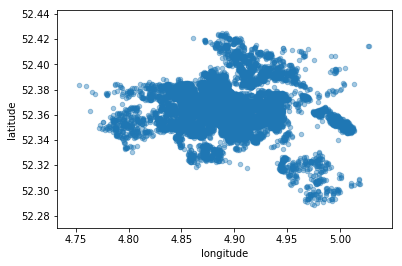

In [82]:
newreview['Afinnscore'] = newreview['Afinnscore'].replace(np.nan, 0)
plt.figure(figsize=(30,20))
newreview.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

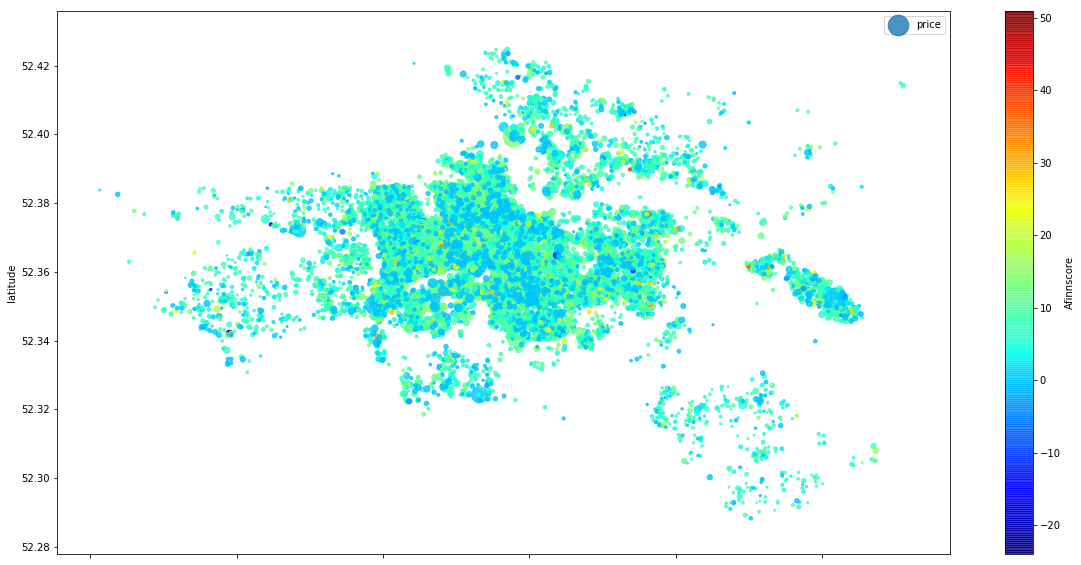

In [93]:
newreview.plot(kind="scatter", x="longitude", y="latitude",
    s=newreview['price']/10, label="price",
    c="Afinnscore", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.8, figsize=(20,10),
)
plt.legend()
plt.show()

In [63]:

# x = newreview.price
# y = newreview.Afinnscore

# plt.scatter(x,y, label='skitscat', color='b', s=25, marker="o")
# plt.show()

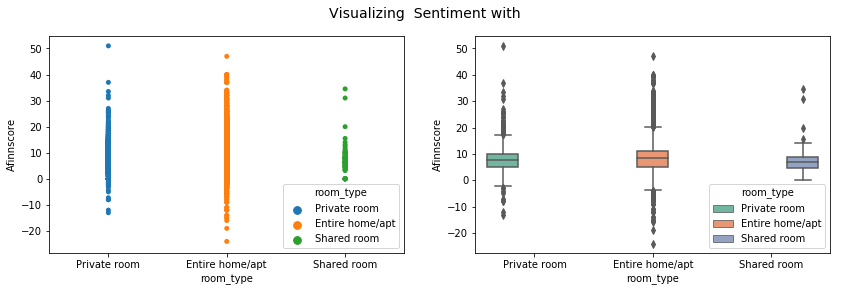

In [70]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='room_type', y="Afinnscore", 
                   hue='room_type', data=newreview, ax=ax1)
bp = sns.boxplot(x='room_type', y="Afinnscore", 
                 hue='room_type', data=newreview, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing  Sentiment with ', fontsize=14)
plt.show()

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newreview.drop('price', axis=1),
                                                    newreview['price'], 
                                                    test_size=0.1,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(18027, 17)
(2003, 17)


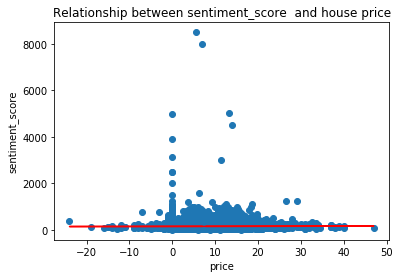

In [141]:
lm = LinearRegression()
lm.fit(X_train[['Afinnscore']], y_train)
import matplotlib.pyplot as plt
plt.scatter(X_train['Afinnscore'], y_train)
plt.xlabel('price')
plt.ylabel('sentiment_score')
plt.title('Relationship between sentiment_score  and house price')
plt.plot(X_train['Afinnscore'], lm.predict(X_train[['Afinnscore']]), color='red') 
plt.show()

In [87]:
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_normalized

averagescore,-24.0,-19.0,-16.0,-15.0,-14.0,-13.0,-12.0,-11.0,-9.0,-8.0,...,33.0,33.5,34.0,34.5,37.0,38.0,39.0,40.0,47.0,51.0
sentiment,,,,,,,,,,,,,,,,,,,,,
highly negative,0.125,0.125,0.125,0.25,0.25,0.125,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
highly positive,0.000,0.000,0.000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,...,0.026596,0.021277,0.015957,0.010638,0.037234,0.010638,0.010638,0.015957,0.005319,0.005319
negative,0.000,0.000,0.000,0.00,0.00,0.000,0.000000,0.005698,0.008547,0.014245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
netural,0.000,0.000,0.000,0.00,0.00,0.000,0.006601,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
positive,0.000,0.000,0.000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline